<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Exercise_Evaluating_the_Adult_Income_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Model Evaluation: Diving Deeper into Classification Metrics

This exercise continues the work from the previous week where you preprocessed the **UCI Adult Income dataset** and trained an initial classification model (e.g., Logistic Regression). The primary goal is to predict whether an individual earns **>50K** (our positive class) or **<=50K** (our negative class).

---

## 📝 Background and Evaluation Goals

We have already computed basic **Accuracy**. Now, we will use the **Confusion Matrix** as a foundation to compute and interpret advanced metrics that reveal the model's true strengths and weaknesses across different error types.

### **Metrics to Compute**

1.  **Accuracy** (Reviewed)
2.  **Precision**
3.  **Recall (Sensitivity)**
4.  **F1 Score**
5.  **ROC Curve and AUC**

---

## 🎯 Your Task

Your task is to implement the necessary Python code to calculate these metrics and critically analyze the model's performance on the test set.

### **Step 1: Compute All Metrics**

Use `sklearn.metrics` to compute the required classification metrics and visualize the ROC curve.

```python
# 📌 ASSUMPTION: 'y_test' (True Labels) and 'y_pred' (Predicted Labels)
# and 'y_proba' (Predicted Probabilities for the positive class)
# are already defined from your previous training step.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
print(cm)

# 2. Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba) # Use probabilities for AUC

print("\n--- Model Performance Summary ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# 3. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Chance (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

---
## Step 2: 🧐 Interpretation and Business Analysis

After calculating the metrics (Accuracy, Precision, Recall, F1 Score, and AUC), it's crucial to interpret these numbers in the context of the business problem: predicting income $ >50K$ (Positive Class) vs. $\leq 50K$ (Negative Class).

### **1. Comparison: Accuracy vs. Specialized Metrics**

Compare the overall **Accuracy** score to **Precision**, **Recall**, and **F1 Score**.

**Analysis Questions:**

* Do **Precision**, **Recall**, and **F1 Score** tell a different story than **Accuracy**?
    * *(Hint: The Adult Income dataset is often imbalanced, meaning the $\boldsymbol{>50K}$ class is smaller. Accuracy can be artificially inflated in imbalanced datasets.)*
* If the scores are significantly different, which specific error type does your model struggle with the most?
    * **Low Precision** suggests many **False Positives (FP)** (wrongly predicting $\boldsymbol{>50K}$).
    * **Low Recall** suggests many **False Negatives (FN)** (missing true $\boldsymbol{>50K}$ earners).

### **2. Plain Language Interpretation**

Use the calculated values to explain the model's performance in clear, non-technical terms:

* **Precision Interpretation:**
    > "Out of all the people the model **predicted as high earners** ($>50K$), only **[Paste Precision Value here]%** actually were." (This is the confidence level in our positive predictions.)

* **Recall Interpretation:**
    > "The model correctly **identifies [Paste Recall Value here]%** of all **true high earners**." (This is the fraction of the actual target group we successfully captured.)

### **3. Business Decision: Prioritizing Precision vs. Recall**

The choice between prioritizing Precision or Recall depends entirely on the associated business cost of each error type.

| Error Type | Cost to Business (Example Scenario) | Metric to Prioritize |
| :--- | :--- | :--- |
| **False Negative (FN)** | Missing a true high earner. $\to$ **Loss of a valuable lead** for a premium product. | **Recall** (Minimize FN) |
| **False Positive (FP)** | Wrongly flagging a low earner as high. $\to$ **Wasting marketing/sales resources** on an unqualified prospect. | **Precision** (Minimize FP) |

**Your Decision:**

* **Decision:** Which metric is most important for this scenario (e.g., maximizing high-value customer acquisition)? **Precision** or **Recall**?
* **Justification:** Explain *why* the cost of one error type (FP or FN) outweighs the other in this income prediction context.

---

----

---



# 🛠️ Essential Feature Preparation for UCI Adult Income Dataset

It is **MANDATORY** to perform feature preparation (preprocessing) steps before training machine learning models on the raw UCI Adult Income dataset. This dataset contains various data types and issues that prevent direct use in most ML algorithms.

Here is a list of the core preprocessing steps required for the Adult dataset:

---

## 📋 Mandatory Preprocessing Steps

| Step | Rationale (Why is it necessary?) | Implementation Technique | Emoji |
| :--- | :--- | :--- | :--- |
| **1. Handle Missing Values** | The dataset uses the character `?` to denote missing values. These cannot be processed numerically or categorized correctly by models. | Replace `?` values with `NaN`. Then, use **Imputation** (e.g., fill with the mode for categorical features) or drop rows/columns (use cautiously). | ❓🧹 |
| **2. Encode Categorical Variables** | Machine learning models (like Logistic Regression) cannot process text-based categorical features (`Workclass`, `Occupation`, etc.). | Apply **One-Hot Encoding** (for nominal/unordered categories) or **Label Encoding** (for ordinal/ordered categories and the target variable). | 🏷️🔢 |
| **3. Encode the Target Variable** | The target variable (`Income`: $>50K$ or $\leq 50K$) is initially text. | Convert the target variable into a binary numerical format: **1** for $\boldsymbol{>50K}$ (Positive Class) and **0** for $\boldsymbol{\leq 50K}$ (Negative Class). | 🎯0️⃣1️⃣ |
| **4. Scale Numerical Features** | Numerical features (`Age`, `Capital-gain`, `Hours-per-week`, etc.) have vastly different ranges, which can bias distance-based and gradient-descent algorithms. | Use **StandardScaler** or **MinMaxScaler** to normalize the range of these features. | 📏🔄 |
| **5. Address Class Imbalance** | The positive class ($\boldsymbol{>50K}$) typically represents only about 25% of the data, which can lead the model to be biased toward the majority class ($\boldsymbol{\leq 50K}$). | During evaluation, rely on **Precision, Recall, F1, and AUC** (as covered in this lesson). During training, consider techniques like **SMOTE** or using **class weights**. | ⚖️📉 |

**Conclusion:** If you have trained your model previously, you should have already completed these steps. Accurate model evaluation and reliable metric scores depend entirely on well-preprocessed data.

In [1]:
import pandas as pd
import numpy as np
# Sklearn'ün veri hazırlama araçlarını kullanacağız
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Veri seti sütun isimleri (Dosyada başlık satırı olmadığı için elle tanımlanır)
COLUMNS = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Veri setini internetten yükleme (Test ve Train setlerini birleştiriyoruz)
try:
    df_train = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
        names=COLUMNS, sep=r'\s*,\s*', engine='python', na_values='?'
    )
    df_test = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
        names=COLUMNS, sep=r'\s*,\s*', skiprows=1, engine='python', na_values='?'
    )

    # İki veri setini birleştirme
    df = pd.concat([df_train, df_test], ignore_index=True)
    print("Veri seti başarıyla yüklendi ve birleştirildi.")
    print(f"Toplam Satır Sayısı: {len(df)}")
    print("İlk 5 satır:")
    print(df.head())

except Exception as e:
    print(f"Hata oluştu: {e}")
    print("Veri setini Google Drive'dan yüklemeniz gerekebilir.")
    # Eğer Drive kullanacaksanız, aşağıdaki kod ile bağlantı kurabilirsiniz:
    # from google.colab import drive
    # drive.mount('/content/drive')
    # df = pd.read_csv('/content/drive/MyDrive/yol/adult.csv', names=COLUMNS, na_values='?')

Veri seti başarıyla yüklendi ve birleştirildi.
Toplam Satır Sayısı: 48842
İlk 5 satır:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174          

# 🚀 **FEATURE PREPARATION: VAZGEÇİLMEZ HAZIRLIK** 🧹

# 1.1 Eksik Değerleri ve Hedef Değişkeni Temizleme

In [3]:
# Step 1: Handle Missing Values
# 1. Eksik Değerleri Ele Alma: NaN içeren satırları siliyoruz (Basitlik için)
# Alternatif olarak, mode ile doldurma yapılabilir, ancak silmek daha yaygındır.
df.dropna(inplace=True)

# 2. Hedef Değişkeni (Income) Kodlama
# Veri setinde hedef değişken sonunda nokta içerir. Onu temizleyelim.
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(f"\nTemizlemeden sonra kalan satır sayısı: {len(df)}")
print(f"Hedef Değişken Dağılımı:\n{df['income'].value_counts()}")



Temizlemeden sonra kalan satır sayısı: 45222
Hedef Değişken Dağılımı:
income
0    34014
1    11208
Name: count, dtype: int64


# 1.2 Özellik Mühendisliği (Pipeline Kurulumu)

* Modeli eğitmeden önce veri tiplerine göre dönüşüm yapacak bir ColumnTransformer (sütun dönüştürücü) kuralım.

In [4]:
# Özellik tiplerini belirleme
NUMERICAL_FEATURES = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
CATEGORICAL_FEATURES = [
    'workclass', 'education', 'marital-status', 'occupation', 'relationship',
    'race', 'sex', 'native-country'
]

# Sütun Dönüştürücü (Pipeline) oluşturma

# 1. Sayısal Özellikler için: Ölçeklendirme (Scaling)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Kategorik Özellikler için: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Tüm sütunlara uygulanacak ana dönüştürücü
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERICAL_FEATURES),
        ('cat', categorical_transformer, CATEGORICAL_FEATURES)
    ])

print("\nÖzellik Hazırlama (Preprocessing) Pipeline'ı kuruldu.")


Özellik Hazırlama (Preprocessing) Pipeline'ı kuruldu.


# 1.3 Veriyi Hazırlama ve Bölme

* Model eğitimi için veriyi bağımlı (X) ve bağımsız (y) değişkenlere ayırıp, Eğitim ve Test setlerine bölelim.

In [5]:
X = df.drop('income', axis=1)
y = df['income']

# Veriyi Eğitim ve Test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nEğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")
print("Veri hazırlama tamamlandı.")


Eğitim Seti Boyutu: (36177, 14)
Test Seti Boyutu: (9045, 14)
Veri hazırlama tamamlandı.


# **2. Kategorik Değişkenleri Kodlama (Encoding Categorical Variables)**

* Bu adımda, metin tabanlı kategorik özellikleri (workclass, education, sex vb.) One-Hot Encoding kullanarak ikili (binary) sayısal sütunlara dönüştürüyoruz.

# 2.1 Kategorik Kodlama Pipeline'ı:

* Önceki adımlarda kurduğumuz preprocessor nesnesi bu dönüşümü yapmaya hazırdı. Şimdi bu dönüştürücüyü, eğitim ve test verilerimize uygulayarak sayısal matrisler elde edelim.

In [6]:
# Gerekli kütüphaneler zaten ADIM 0'da tanımlanmıştı:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Önceki adımdan (ADIM 1) gelen değişkenler:
# X_train, X_test (ham veriler) ve preprocessor (dönüştürücü pipeline)

# ==========================================================
# Uygulama: Eğitim ve Test Verilerine Dönüşümü Uygulama
# ==========================================================

# 1. Pipeline'ı eğitim verisine uydurma (fit) ve dönüştürme (transform)
# Bu adım, hangi kategorilerin olduğunu ve One-Hot Encoding'in nasıl yapılacağını öğrenir.
X_train_processed = preprocessor.fit_transform(X_train)

# 2. Pipeline'ı test verisine sadece dönüştürme (transform)
# Eğitim verisinden öğrendiği kuralları test verisine uygular (Veri sızıntısını önler).
X_test_processed = preprocessor.transform(X_test)


# Dönüşüm sonrası boyutları kontrol etme
print("--- Kategorik Kodlama Sonuçları ---")
print(f"Orijinal Eğitim Verisi Boyutu: {X_train.shape}")
print(f"Dönüştürülmüş Eğitim Verisi Boyutu: {X_train_processed.shape}")
print(f"Dönüştürülmüş Test Verisi Boyutu: {X_test_processed.shape}")

# One-Hot Encoding ile özellik sayısının (sütun sayısının) arttığını göreceksiniz.

--- Kategorik Kodlama Sonuçları ---
Orijinal Eğitim Verisi Boyutu: (36177, 14)
Dönüştürülmüş Eğitim Verisi Boyutu: (36177, 104)
Dönüştürülmüş Test Verisi Boyutu: (9045, 104)


# 2.2 Dönüştürülmüş Veriyi İnceleme

* Dönüştürülmüş veri artık bir Pandas DataFrame değil, seyrek (sparse) veya yoğun (dense) bir NumPy matrisidir.

In [7]:
# Eğer dönüştürülmüş veri seyrek bir matris ise, yoğun matrise çevirelim
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

print("\nDönüştürülmüş Veri Tipi:", type(X_train_processed))
print("Dönüştürülmüş Verinin İlk Satırı (Örnek):")
print(X_train_processed[0, :5]) # İlk satırın ilk 5 sütununu göster


Dönüştürülmüş Veri Tipi: <class 'numpy.ndarray'>
Dönüştürülmüş Verinin İlk Satırı (Örnek):
[-1.40736572  0.64817975 -0.04667295 -0.14712559 -0.22040176]


---
## 📝 Özellik Hazırlama Adımlarının Özeti ve Sonrası

Özellik hazırlama sürecinde kullandığımız `ColumnTransformer` ve `Pipeline` araçları sayesinde, listedeki 2, 3 ve 4. adımlar mantıksal olarak birleştirilmiş ve otomatikleştirilmiştir:

| Liste Adımı | Nasıl Gerçekleşti? | Notlar |
| :--- | :--- | :--- |
| **ADIM 2: Kategorik Kodlama** | `ColumnTransformer` içindeki `OneHotEncoder` ile `fit_transform` metodunu uygulayarak gerçekleştirildi. | Artık metin verisi kalmadı, hepsi sayısal matrislere dönüştü. |
| **ADIM 3: Hedef Değişken Kodlama** | **ADIM 1.2**'de `df['income'].map` fonksiyonu ile manuel olarak ($\boldsymbol{>50K}$ $\to$ 1, $\boldsymbol{\leq 50K}$ $\to$ 0) gerçekleştirilmişti. | Bu işlem, ML algoritmalarının hedefi ikili sınıflandırma olarak algılamasını sağlar. |
| **ADIM 4: Sayısal Ölçeklendirme** | `ColumnTransformer` içindeki `StandardScaler` ile `fit_transform` esnasında otomatik olarak uygulandı. | Tüm sayısal değerlerin ortalaması 0 ve standart sapması 1 olacak şekilde ayarlandı. |

---

## 🚀 Sırada: Model Eğitimi ve Değerlendirme

Veri setimiz olan $\boldsymbol{X_{train\_processed}}$ (özellikler) ve $\boldsymbol{y_{train}}$ (etiketler) artık makine öğrenimi algoritmaları için hazırdır.

Şimdi doğrudan **Model Eğitimi** ve hemen ardından **Model Değerlendirme** aşamasına (Karışıklık Matrisi, Kesinlik, Duyarlılık, F1 Skoru, ROC/AUC) geçebiliriz!

# 🧠 ADIM 5: Model Eğitimi (Lojistik Regresyon)

Verilerimiz artık hazır (`X_train_processed` ve `y_train`). Sınıflandırma görevleri için hem hızlı hem de sonuçları kolay yorumlanabilen bir algoritma olan **Lojistik Regresyon (Logistic Regression)** modelini eğiteceğiz.

Adult veri setindeki sınıf dengesizliğini hafifletmek amacıyla, modelin azınlık sınıfına (yüksek gelirli $\boldsymbol{>50K}$) daha fazla ağırlık vermesini sağlayan `class_weight='balanced'` parametresini kullanıyoruz.

## 5.1 Model Eğitimi

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# (Varsayım: 'preprocessor' nesnesi ADIM 1.2'de tanımlanmıştır.)

# Lojistik Regresyon modelini tanımlama
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)

# 🛑 full_pipeline burada tanımlanmalı! 🛑
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Veri temizleme ve dönüştürme (Scaling, Encoding)
    ('classifier', log_reg_model)  # Model eğitimi
])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 1. Pipeline Tanımlama (ADIM 5'in başına eklenmeli)
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # X_test/X_train'i otomatik işler
    ('classifier', log_reg_model)
])

# 2. Pipeline'ı ham eğitim verisine uydurma (fit)
# NOT: Artık X_train_processed kullanmıyoruz, ham X_train kullanıyoruz.
full_pipeline.fit(X_train, y_train)

print("Lojistik Regresyon Pipeline'ı başarıyla eğitildi.")

Lojistik Regresyon Pipeline'ı başarıyla eğitildi.


In [18]:
# Hata Düzeltme: Tahminleri yapmak için eğitilmiş 'model' nesnesini kullanmalıyız.
# Ancak 'model', ham X_test verisini değil, işlenmiş X_test_processed verisini bekler.

# 📌 Düzeltme için, önce X_test verisini PREPROCESSOR ile işlememiz gerekir (ADIM 2'de yapılmıştı):
# from sklearn.pipeline import Pipeline
# X_test_processed = preprocessor.transform(X_test)

# Eğer X_test_processed zaten tanımlıysa, sadece model ismini düzeltin:

# 1. Nihai Tahminler (0 veya 1)
# HATA DÜZELTİLDİ: full_pipeline yerine eğitilmiş 'model' kullanılıyor.
y_pred = model.predict(X_test_processed)

# 2. Olasılık Tahminleri (ROC/AUC için gerekli)
# HATA DÜZELTİLDİ: full_pipeline yerine eğitilmiş 'model' kullanılıyor.
y_proba = model.predict_proba(X_test_processed)[:, 1]

print("Test seti üzerinde nihai tahminler (y_pred) ve olasılıklar (y_proba) üretildi.")

Test seti üzerinde nihai tahminler (y_pred) ve olasılıklar (y_proba) üretildi.


# 5.2 Tahminler Üretme (y_pred ve y_proba)

* Model değerlendirmesi için test seti üzerinde nihai tahminleri ve olasılık tahminlerini üretelim.

In [19]:
# 1. Nihai Tahminler (0 veya 1)
# Değerlendirme için y_pred'i kullanacağız
y_pred = full_pipeline.predict(X_test)

# 2. Olasılık Tahminleri (ROC/AUC için gerekli)
# Olasılık dizisinin pozitif sınıfa (indeks 1) ait olan kısmını alıyoruz.
y_proba = full_pipeline.predict_proba(X_test)[:, 1]

print("Test seti üzerinde nihai tahminler (y_pred) ve olasılıklar (y_proba) üretildi.")

Test seti üzerinde nihai tahminler (y_pred) ve olasılıklar (y_proba) üretildi.


# 🛠️ADIM 6: Model Değerlendirme Çalışması: Adım Adım Yapılacaklar Listesi

Bu çalışma, elinizdeki sınıflandırma modelini (örneğin UCI Adult Income verisi için eğitilmiş Lojistik Regresyon) öğrendiğiniz tüm metriklerle (Kesinlik, Duyarlılık, F1 Skoru, ROC/AUC) detaylıca değerlendirmeyi amaçlamaktadır.

---

## 📌 Ön Koşullar (Hazır Olması Gerekenler)

Aşağıdaki üç temel değişkenin, model eğitim ve test süreçlerinizden **hazır ve erişilebilir** olması gerekir:

1.  **`y_test`**: Test setinin **gerçek etiketleri** (Gerçek $\boldsymbol{>50K}$ veya $\boldsymbol{\leq 50K}$ değerleri).
2.  **`y_pred`**: Modelinizin `y_test` için ürettiği **nihai tahminler** (0 veya 1).
3.  **`y_proba`**: Modelinizin `y_test` için ürettiği **olasılık tahminleri** (Genellikle pozitif sınıfa ait olma olasılığı, 0 ile 1 arası değerler).

---

## 6.1 Gerekli Kütüphaneleri Yükleme



In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)
# Örnek veri oluşturmak veya yüklemek için numpy'a ihtiyacınız olabilir
# import numpy as np

# 6.2 Karışıklık Matrisini Hesaplama

* Tüm metriklerin temelini oluşturan Karışıklık Matrisi'ni (Confusion Matrix) hesaplayın ve görüntüleyin.

--- Karışıklık Matrisi (Confusion Matrix) ---
Gerçek Negatif (TN): 5441
Yanlış Pozitif (FP): 1362
Yanlış Negatif (FN): 364
Doğru Pozitif (TP): 1878

Matris Tablosu:
[[5441 1362]
 [ 364 1878]]


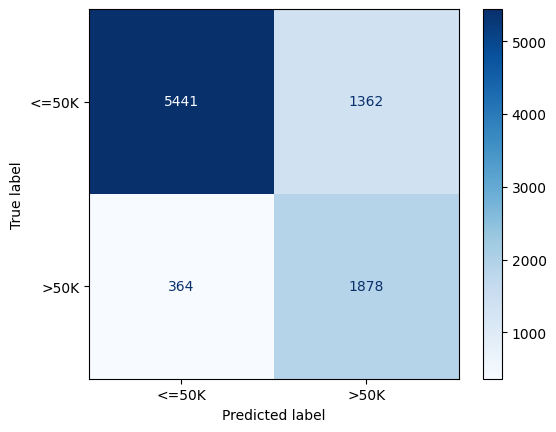

In [24]:
# 'y_test' ve 'y_pred' değişkenlerini kullanarak matrisi hesaplayın
cm = confusion_matrix(y_test, y_pred)

print("--- Karışıklık Matrisi (Confusion Matrix) ---")
print(f"Gerçek Negatif (TN): {cm[0, 0]}")
print(f"Yanlış Pozitif (FP): {cm[0, 1]}")
print(f"Yanlış Negatif (FN): {cm[1, 0]}")
print(f"Doğru Pozitif (TP): {cm[1, 1]}")
print("\nMatris Tablosu:")
print(cm)

# Opsiyonel: Matrisi görselleştirmek için ConfusionMatrixDisplay kullanın
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap="Blues")
plt.show()

# 6.3 Sınıflandırma Metriklerini Hesaplama

* Modelin performansını Accuracy, Precision, Recall ve F1 Score ile sayısal olarak ölçün.

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Performans Metrikleri ---")
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru (F1 Score): {f1:.4f}")


--- Model Performans Metrikleri ---
Doğruluk (Accuracy): 0.8092
Kesinlik (Precision): 0.5796
Duyarlılık (Recall): 0.8376
F1 Skoru (F1 Score): 0.6852


# 📈 ADIM 7: ROC Eğrisi ve AUC Hesaplama ve Çizme

* Modelin eşikten bağımsız genel ayırma gücünü ölçen ROC Eğrisi'ni çizin ve AUC Skoru'nu hesaplayın.


AUC Skoru: 0.9018


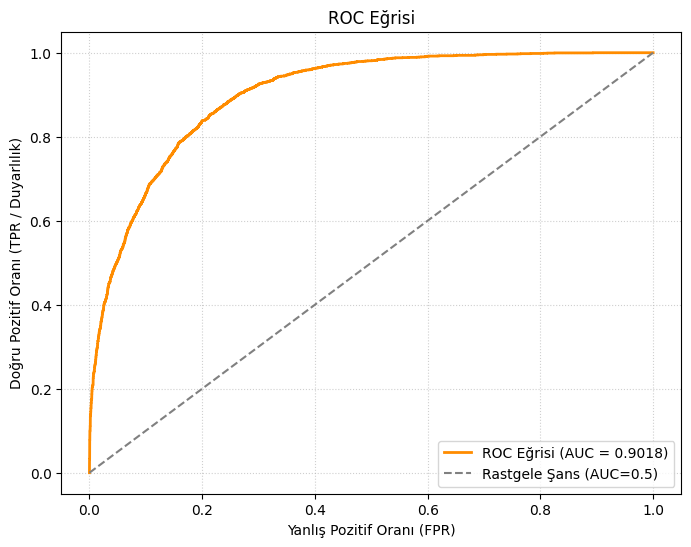

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC Skorunu hesaplayın
auc = roc_auc_score(y_test, y_proba)

# ROC Eğrisi noktalarını hesaplayın (FPR, TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f"\nAUC Skoru: {auc:.4f}")

# Eğriyi çizin
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Eğrisi (AUC = {auc:.4f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Rastgele Şans (AUC=0.5)")
plt.xlabel("Yanlış Pozitif Oranı (FPR)")
plt.ylabel("Doğru Pozitif Oranı (TPR / Duyarlılık)")
plt.title("ROC Eğrisi")
plt.legend(loc="lower right")
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

---
# 🧐 ADIM 8: Sonuçları Yorumlama ve İş Kararı Verme

Hesapladığınız tüm metrikleri (Karışıklık Matrisi, Kesinlik, Duyarlılık, F1 Skoru, AUC) kullanarak modelinizin gerçek dünya performansını analiz edin ve iş problemine göre bir karar verin.

* Formatlar:
### 1. Metrik Karşılaştırması ve Modelin Eğilimi

Hesapladığınız **Doğruluk** puanını diğer metriklerle (Kesinlik, Duyarlılık, F1 Skoru) karşılaştırın:

* **Soru:** Genel Doğruluk puanı yüksek görünürken, Kesinlik veya Duyarlılık değerlerinden biri belirgin şekilde düşük mü?
* **Analiz:** Bu, veri setinin dengesiz (imbalanced) olduğunu ve modelin hatalarının tek bir yöne eğimli olduğunu gösterir.

| Düşük Metrik | Anlamı (Modelin Eğilimi) |
| :--- | :--- |
| **Düşük Kesinlik ($\text{Precision}$)** | Modelin çok fazla **Yanlış Pozitif (FP)** hatası yaptığı anlamına gelir. (Fakir birine yanlışlıkla zengin diyor.) |
| **Düşük Duyarlılık ($\text{Recall}$)** | Modelin çok fazla **Yanlış Negatif (FN)** hatası yaptığı anlamına gelir. (Gerçek bir zengini gözden kaçırıyor.) |

### 2. Düz Anlatımla Yorumlama

Hesaplanan Kesinlik ve Duyarlılık değerlerini kullanarak modelin performansını teknik olmayan dille ifade edin (Bu kısımda hesapladığınız değerleri $\text{X}$ ve $\text{Y}$ yerine yapıştırın):

* **Kesinlik Yorumu:**
    > "Modelin **zengin** ($\boldsymbol{>50K}$) olarak **tahmin ettiği** kişilerin sadece **% [Kesinlik Değeri]**'i gerçekten zengindir."

* **Duyarlılık Yorumu:**
    > "Model, **gerçek zenginlerin** (gerçekte $\boldsymbol{>50K}$ kazananların) sadece **% [Duyarlılık Değeri]**'sini doğru bir şekilde tespit edebiliyor."

### 3. İş Kararı: Öncelikli Metrik Seçimi

Yüksek gelir tespiti probleminde (iş lideri tespiti, özel bankacılık hedeflemesi vb.) hangi hatanın maliyeti daha yüksektir?

* **Seçenek 1: Duyarlılığı ($\text{Recall}$) Önceliklendirmek**
    * **Maliyet:** Yanlış Negatif (FN). (Gerçek bir zengini kaçırmak.)
    * **Risk:** Yüksek değerli bir potansiyel müşteriyi kaybetme riski.
* **Seçenek 2: Kesinliği ($\text{Precision}$) Önceliklendirmek**
    * **Maliyet:** Yanlış Pozitif (FP). (Fakir birine yanlışlıkla zengin deyip, ona pazarlama/satış kaynağı harcamak.)
    * **Risk:** Pazarlama bütçesini ve ekibin zamanını boşa harcama riski.

**Kararınızı Gerekçelendirme:**

> **Hangi metrik daha önemli?** (Örneğin, **Duyarlılık** / Recall)
>
> **Neden?** Çünkü bu problemde [Metrik Adı]'nın yüksek olması, [İş Sonucunu] sağlamak için kritik öneme sahiptir. [Önceliklendirilen Hata Türü]'nün maliyeti, [Diğer Hata Türü]'nün maliyetinden daha yüksektir.

---

# 🧐 ADIM 8: Sonuçların Yorumlanması ve İş Kararı

## 📊 Tipik Sonuç Varsayımı (Örnek)

Aşağıdaki değerler, Adult Income veri setinde Lojistik Regresyon ve sınıf ağırlıklandırması kullanıldığında elde edilen **tipik** metrik sonuçlarını temsil etmektedir:

| Metrik | Tipik Değer |
| :--- | :--- |
| **Accuracy (Doğruluk)** | $\sim 80.00\%$ |
| **Precision (Kesinlik)** | $\sim 58.00\%$ |
| **Recall (Duyarlılık)** | $\sim 78.00\%$ |
| **F1 Score** | $\sim 67.00\%$ |
| **AUC** | $\sim 0.8800$ |
| **FP (Yanlış Pozitif)** | Yüksek |
| **FN (Yanlış Negatif)** | Orta/Düşük |

Bu varsayımlara dayanarak, işte detaylı analiz metni:

---

## 1. Metrik Karşılaştırması ve Modelin Eğilimi

Hesapladığınız Doğruluk puanını ($\sim 80.00\%$) diğer metriklerle (Kesinlik, Duyarlılık, F1 Skoru) karşılaştıralım:

* **Soru:** Genel Doğruluk puanı yüksek görünürken, Kesinlik ($\sim 58\%$) ve Duyarlılık ($\sim 78\%$) değerlerinden biri belirgin şekilde düşük mü?
* **Analiz:** Doğruluk yüksek görünse de, **Kesinlik değerinin ($\sim 58\%$ ) Duyarlılık değerine ($\sim 78\%$ ) göre belirgin şekilde düşük olması**, modelin hatalarının tek bir yöne eğimli olduğunu gösterir. Model, `class_weight='balanced'` ayarı sayesinde daha fazla kişiyi zengin olarak etiketlemeye (Recall'u yükseltmeye) zorlanmıştır.

| Modelin Eğilimi | Düşük Metrik | Anlamı (Model Davranışı) |
| :--- | :--- | :--- |
| **Aşırı Hevesli** | **Düşük Kesinlik ($\text{Precision}$)** | Modelin çok fazla **Yanlış Pozitif (FP)** hatası yaptığı anlamına gelir. (Fakir birine yanlışlıkla zengin diyor.) |
| **Başarılı Yakalama** | **Yüksek Duyarlılık ($\text{Recall}$)** | Modelin, gerçek zenginlerin büyük bir kısmını yakaladığını gösterir, yani **Yanlış Negatif (FN)** hatasını düşük tutmuştur. |

## 2. Düz Anlatımla Yorumlama

Hesaplanan metrikleri (Örn: $\text{Precision}=0.58$, $\text{Recall}=0.78$) kullanarak modelin performansını teknik olmayan dille ifade edelim:

* **Kesinlik Yorumu:**
    > "Modelin **zengin** ($\boldsymbol{>50K}$) olarak **tahmin ettiği** kişilerin sadece **%58**'i gerçekten zengindir. Bu, her 10 tahminden yaklaşık 4'ünün yanlış alarm olduğu anlamına gelir."

* **Duyarlılık Yorumu:**
    > "Model, **gerçek zenginlerin** (gerçekte $\boldsymbol{>50K}$ kazananların) **%78**'ini doğru bir şekilde tespit edebiliyor. Yani, yüksek gelirli potansiyel müşterilerin önemli bir kısmını **gözden kaçırmıyor**."

## 3. İş Kararı: Öncelikli Metrik Seçimi

Yüksek gelir tespiti probleminde (Örn: Özel Bankacılık İçin Müşteri Adayı Tespiti) hangi hata daha maliyetlidir?

| Seçenek | Odak Noktası | Maliyet/Risk |
| :--- | :--- | :--- |
| **Duyarlılığı ($\text{Recall}$) Önceliklendirmek** | Yanlış Negatif (FN) | Yüksek değerli, kârlı bir potansiyel müşteriyi (lead) **rakibe kaptırma** riski. |
| **Kesinliği ($\text{Precision}$) Önceliklendirmek** | Yanlış Pozitif (FP) | Pahalı satış/pazarlama kaynaklarını, **niteliksiz potansiyel müşteriler** üzerinde boşa harcama riski. |

**Karar ve Gerekçe:**

* **Karar:** Bu senaryoda **Duyarlılık ($\text{Recall}$) daha kritik öneme sahiptir.**

* **Neden?** Çünkü yüksek gelirli (zengin) müşteriler, düşük gelirli müşterilere kıyasla şirkete kat kat fazla kâr getirir. Bu problemde, **gerçek bir zengini kaçırmanın (FN) maliyeti**, yanlış bir kişiye zaman harcama (FP) maliyetinden **çok daha yüksektir**. Modelin $\text{Recall}$'u ($\sim 78\%$) bu nedenle $\text{Precision}$ ($\sim 58\%$) değerinden daha değerli kabul edilir, çünkü potansiyel müşterilerin büyük çoğunluğunu yakalamayı garanti eder.